# Data preprocessing

## Data import

In [28]:
import pandas as pd
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [29]:
X = train.drop(columns = "target")
y = train["target"]

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
X_train['target'] = y_train
X_val['target'] = y_val

In [32]:
train = X_train.copy()
val = X_val.copy()

In [33]:
train = train.dropna()
val = val.dropna()

In [34]:
#Keep average cost min
averagecostmin = val['average cost min']
idtest = test["id"]

## Initial Exploration

In [35]:
train.describe()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,...,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,target
count,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,...,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000
mean,31.418403,33.692675,2.673115,239.123016,709.319559,104.113839,312.170469,16.334821,50.117233,169.677704,...,10.081397,19.148192,73.555944,186.897819,0.168059,0.610169,0.328068,0.061763,0.162448,0.146329
std,12.778218,14.006476,3.419745,239.289112,503.745589,97.255574,199.059794,16.296709,36.080006,141.764351,...,2.108023,27.992736,59.989152,82.037001,0.077313,0.223896,0.209820,0.063645,0.105589,0.353480
min,12.000000,9.633333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034634,...,2.000000,0.000000,0.010390,60.000842,0.048998,0.000000,0.000000,0.000000,0.000030,0.000000
25%,22.000000,21.291667,0.000000,59.000000,307.800001,28.000000,150.000000,4.000000,22.800000,64.538731,...,8.573250,0.000000,32.168235,123.926851,0.134406,0.466570,0.165197,0.020977,0.079269,0.000000
50%,29.000000,33.650000,1.000000,161.000000,615.000000,73.000000,291.150000,11.000000,44.399999,132.301181,...,9.518597,7.547389,57.875946,173.404650,0.154501,0.654919,0.287928,0.043940,0.157865,0.000000
75%,39.000000,45.933333,2.000000,343.000000,1014.900000,156.000000,446.475000,24.000000,72.000000,236.883563,...,11.696253,28.328732,99.290441,232.132750,0.179244,0.782404,0.458625,0.081047,0.244300,0.000000
max,80.000000,58.200000,15.000000,1626.000000,2901.600001,560.000000,1091.099999,106.000000,205.000000,935.947864,...,21.734694,184.892166,437.063835,587.063835,1.357564,1.000000,1.000000,0.731884,2.601223,1.000000


In [36]:
train.describe(include = 'object')

,Gender,Connect_Date,tariff,Handset,Usage_Band,Tariff_OK,high Dropped calls,No Usage,id
count,4032,4032,4032,4032,4032,4032,4032,4032,4032
unique,2,1310,5,11,5,4,2,1,4032
top,F,11/07/99,CAT 200,S50,Med,OK,F,F,K277140
freq,2040,11,1802,944,2232,4003,3930,4032,1


## Prepocessing

### Drop ID, drop Connect_Date (too many unique values, do not provide information on response)

In [37]:
train = train.drop(columns = ["id", "Connect_Date"])

In [38]:
val = val.drop(columns = ["id", "Connect_Date"])
test = test.drop(columns = ["id", "Connect_Date"])

### Dropping numerical variables that are useless

In [39]:
correlation_matrix = train[train.select_dtypes(include=['number']).columns.tolist()].corr()

In [40]:
corrtarget = correlation_matrix['target']

In [41]:
# Make plot for this

In [42]:
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))


In [43]:
high_correlation_pairs

[('Peak_calls_Sum', 'National_calls'),
 ('Peak_mins_Sum', 'National mins'),
 ('Peak_mins_Sum', 'All_calls_mins'),
 ('Peak_mins_Sum', 'Total_Cost'),
 ('International_mins_Sum', 'Total_call_cost'),
 ('International_mins_Sum', 'Total_Cost'),
 ('Nat_call_cost_Sum', 'Mins_charge'),
 ('Nat_call_cost_Sum', 'actual call cost'),
 ('National mins', 'All_calls_mins'),
 ('National mins', 'Total_Cost'),
 ('All_calls_mins', 'Total_call_cost'),
 ('All_calls_mins', 'Total_Cost'),
 ('Mins_charge', 'actual call cost'),
 ('Total_call_cost', 'Total_Cost'),
 ('Peak ratio', 'OffPeak ratio')]

In [44]:
from collections import defaultdict

def build_adjacency_list(pairs):
    adjacency_list = defaultdict(list)
    for u, v in pairs:
        adjacency_list[u].append(v)
        adjacency_list[v].append(u)
    return adjacency_list

# Function to perform depth-first search (DFS) traversal to find connected components
def dfs(node, adjacency_list, visited, component):
    visited.add(node)
    component.append(node)
    for neighbor in adjacency_list[node]:
        if neighbor not in visited:
            dfs(neighbor, adjacency_list, visited, component)

# Function to find connected components in the graph
def find_connected_components(pairs):
    adjacency_list = build_adjacency_list(pairs)
    visited = set()
    connected_components = []
    for node in adjacency_list:
        if node not in visited:
            component = []
            dfs(node, adjacency_list, visited, component)
            connected_components.append(component)
    return connected_components

# Find connected groups
connected_groups = find_connected_components(high_correlation_pairs)

In [45]:
def get_variables_to_drop(group, corrtarget):
    max_cor = 0
    var_max = ''
    for var in group:
        if abs(corrtarget[var]) > max_cor:
            var_max = var
    group.remove(var_max)

    return group

In [46]:
variables_to_drop = [get_variables_to_drop(group, corrtarget) for group in connected_groups]

In [47]:
drop_vars = [item for sublist in variables_to_drop for item in sublist]

In [48]:
train = train.drop(columns = drop_vars)

In [49]:
val = val.drop(columns = drop_vars)

In [50]:
test = test.drop(columns = drop_vars)

### Deleting categorical variables that are useless

In [51]:
for variable in list(train.describe(include = 'object').columns):
    print(train.groupby('target')[variable].value_counts())

target  Gender
0       F         1760
        M         1682
1       M          310
        F          280
Name: Gender, dtype: int64
target  tariff  
0       CAT 200     1533
        CAT 100      736
        Play 100     502
        Play 300     471
        CAT 50       200
1       CAT 200      269
        Play 100     126
        CAT 100      110
        Play 300      47
        CAT 50        38
Name: tariff, dtype: int64
target  Handset
0       S50        825
        BS110      598
        S80        574
        WC95       526
        ASAD170    514
        BS210      220
        CAS60       90
        ASAD90      42
        CAS30       37
        SOP20       10
        SOP10        6
1       ASAD90     174
        S50        119
        CAS30      106
        BS110       95
        SOP10       28
        SOP20       24
        S80         20
        ASAD170     10
        BS210        8
        WC95         6
Name: Handset, dtype: int64
target  Usage_Band
0       Med           1973

In [52]:
#Make plots for this

No Usage, UsageBand, Tariff seem totally useless, they are dropped for now
Most useful inferences: High Dropped Calls seems a good indicator for whether someone will churn or not, ratio of Trues for churners is much higher. Tariff_Ok's High Cat 100 for churners is much higher than for non churners, would be good to add numerical encoding. Same for handset, numerical encoding would be nice. 

In [53]:
train = train.drop(columns = ["No Usage", "Usage_Band", "tariff"])
test = test.drop(columns = ["No Usage", "Usage_Band", "tariff"])
val = val.drop(columns = ["No Usage", "Usage_Band", "tariff"])

### Handling Missing Values

In [54]:
train.isna().sum()

Gender                 0
Age                    0
L_O_S                  0
Dropped_Calls          0
Handset                0
OffPeak_calls_Sum      0
OffPeak_mins_Sum       0
Weekend_calls_Sum      0
Weekend_mins_Sum       0
AvePeak                0
AveOffPeak             0
AveWeekend             0
National_calls         0
AveNational            0
Dropped_calls_ratio    0
call_cost_per_min      0
actual call cost       0
Total_Cost             0
Tariff_OK              0
average cost min       0
OffPeak ratio          0
Weekend ratio          0
Nat-InterNat Ratio     0
high Dropped calls     0
target                 0
dtype: int64

Almost no missing values, these could be imputed

In [55]:
rows_with_missing_values = train[train.isnull().any(axis=1)]


In [56]:
rows_with_missing_values[["call_cost_per_min", "Dropped_calls_ratio", "target"]]

,call_cost_per_min,Dropped_calls_ratio,target


Missing values are all in the same 4 rows. Since they're only 4 observations out of 5000, they're eliminated from the data

Outliers are not dealt with (they are useful in our detection, the higher the costs the bigger the probability of churning?)

### Transformation of Variables

#### Numerical Variables

In [57]:
test['target'] = 0

In [58]:
test

,Gender,Age,L_O_S,Dropped_Calls,Handset,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,AvePeak,...,call_cost_per_min,actual call cost,Total_Cost,Tariff_OK,average cost min,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,target
0,F,20.0,55.582251,3.0,WC95,110.0,189.982227,8.0,5.017969,9.598648,...,8.933287,9.409262,167.242853,OK,0.116924,0.173365,0.009823,0.020349,F,0
1,F,54.0,32.067010,0.0,BS110,93.0,551.817423,8.0,17.593417,33.547208,...,11.931697,2.739423,136.404621,OK,0.120457,0.532898,0.022391,0.124480,F,0
2,F,28.0,26.621954,0.0,ASAD170,90.0,152.731006,10.0,23.907633,2.945673,...,9.560903,95.406158,397.739114,OK,0.149435,0.034434,0.006660,0.225763,F,0
3,F,26.0,27.652735,5.0,WC95,126.0,358.760706,0.0,3.024655,11.984087,...,8.398145,14.464628,196.789012,OK,0.137372,0.263256,0.005870,0.108872,F,0
4,F,34.0,25.479355,0.0,WC95,73.0,141.180280,11.0,47.034972,8.875573,...,12.766109,34.757126,160.450386,OK,0.180704,0.166995,0.056390,0.090896,F,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,F,32.0,40.097166,0.0,BS110,8.0,42.952890,45.0,105.774031,0.802079,...,9.588439,35.396282,208.523608,OK,0.122342,0.012611,0.070297,0.035339,F,0
1678,M,19.0,22.594431,0.0,BS110,-1.0,73.643988,2.0,28.751955,-2.663694,...,13.794174,30.518649,147.689743,OK,0.163502,0.052157,0.041489,0.079988,F,0
1679,F,34.0,55.339646,0.0,S50,21.0,278.414345,2.0,34.029118,8.078580,...,9.031387,96.373049,302.935896,OK,0.127485,0.106429,0.011459,0.098248,F,0
1680,M,21.0,42.830741,2.0,BS110,76.0,196.742943,-1.0,18.472483,-3.877556,...,11.898371,-0.223523,159.088917,OK,0.205830,0.358159,0.017720,0.256554,F,0


In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# List of numerical variable names
numerical_features = train.select_dtypes(include=['number']).columns.tolist()

# List of categorical variable names (replace with actual categorical variable names)
categorical_features = train.select_dtypes(exclude=['number']).columns.tolist()

# Define the transformers
transformers = [
    ('num', MinMaxScaler(), numerical_features)
]

# Create the column transformer
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

# Apply the column transformer to the data
transformed_train = preprocessor.fit_transform(train)
transformed_val = preprocessor.transform(val)
transformed_test = preprocessor.transform(test)


# Convert the transformed data back to DataFrame
transformed_train = pd.DataFrame(transformed_train, columns=numerical_features + categorical_features)
transformed_test = pd.DataFrame(transformed_test, columns=numerical_features + categorical_features)
transformed_val = pd.DataFrame(transformed_val, columns=numerical_features + categorical_features)



# Only the numerical variables will be scaled to the range [0, 1]

MinMaxScaling (0, 1)

MinMaxScaling (-1, 1)

Normalization + MinMaxScaling

#### Categorical Variables

One-Hot Encoding

In [60]:
for variable in list(train.describe(include = 'object').columns):
    print(train.groupby('target')[variable].value_counts())

target  Gender
0       F         1760
        M         1682
1       M          310
        F          280
Name: Gender, dtype: int64
target  Handset
0       S50        825
        BS110      598
        S80        574
        WC95       526
        ASAD170    514
        BS210      220
        CAS60       90
        ASAD90      42
        CAS30       37
        SOP20       10
        SOP10        6
1       ASAD90     174
        S50        119
        CAS30      106
        BS110       95
        SOP10       28
        SOP20       24
        S80         20
        ASAD170     10
        BS210        8
        WC95         6
Name: Handset, dtype: int64
target  Tariff_OK    
0       OK               3435
        High CAT 100        5
        High CAT 50         1
        High Play 100       1
1       OK                568
        High CAT 100       16
        High CAT 50         4
        High Play 100       2
Name: Tariff_OK, dtype: int64
target  high Dropped calls
0       F           

In [61]:
# Encode binary variables using map
binary_mapping1 = {'M': 1, 'F': 0}
binary_mapping2 = {'T': 1, 'F': 0}

transformed_train['high Dropped calls'] = transformed_train['high Dropped calls'].map(binary_mapping2)
transformed_train['Gender'] = transformed_train['Gender'].map(binary_mapping1)
transformed_test['high Dropped calls'] = transformed_test['high Dropped calls'].map(binary_mapping2)
transformed_test['Gender'] = transformed_test['Gender'].map(binary_mapping1)
transformed_val['high Dropped calls'] = transformed_val['high Dropped calls'].map(binary_mapping2)
transformed_val['Gender'] = transformed_val['Gender'].map(binary_mapping1)


# Filter and encode categorical variables
# For categorical_1, keep only 'High CAT 100', encode the rest as 'Other'
transformed_train['Tariff_OK'] = transformed_train['Tariff_OK'].apply(lambda x: 1 if x == 'High CAT 100' else 0)
transformed_test['Tariff_OK'] = transformed_test['Tariff_OK'].apply(lambda x: 1 if x == 'High CAT 100' else 0)
transformed_val['Tariff_OK'] = transformed_val['Tariff_OK'].apply(lambda x: 1 if x == 'High CAT 100' else 0)

# Encode categorical_2 using one-hot encoding
encoded_train = pd.get_dummies(transformed_train, columns=['Handset'], dtype = int)
encoded_test = pd.get_dummies(transformed_test, columns=['Handset'], dtype = int)
encoded_val = pd.get_dummies(transformed_val, columns=['Handset'], dtype = int)

In [62]:
encoded_train['target'] = encoded_train['target'].astype('category')
encoded_val['target'] = encoded_val['target'].astype('category')

In [63]:
X_train = encoded_train.drop(columns = "target")
y_train = encoded_train["target"]

In [64]:
X_val = encoded_val.drop(columns = "target")
y_val = encoded_val["target"]

# Modelling

## model 1: random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [66]:
import numpy as np
from sklearn import metrics
y_pred = clf.predict(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
metrics.auc(fpr, tpr)

0.8125214998280013

In [67]:
def Profit_top_k(df_results, k = 20, var = 'average cost min'):
    sorted_df = df_results.sort_values(by= "predict_proba", ascending = False)
    sum = 0
    for i in range(0, k):
        if df_results['y_true'][i] == df_results['y_pred'][i]:
            sum += df_results[var][i]
    return sum

In [68]:
y_pred = clf.predict(X_val)
y_pred_proba = clf.predict_proba(X_val)
y_pred_proba = [sublist[1] for sublist in y_pred_proba]

df_results = pd.DataFrame()
df_results['y_pred'] = y_pred
df_results['y_true'] = y_val
df_results['predict_proba'] = y_pred_proba
df_results['average cost min'] = list(averagecostmin)
#Profit_top_k(df_results)
y_pred_proba

[0.9101036269430051,
 0.05012875536480687,
 0.74,
 0.046477583271527054,
 0.046617126364158844,
 0.1830222195282894,
 0.03172997453602716,
 0.07077579745750413,
 0.07511319338582051,
 0.03410450156101714,
 0.010633642090700453,
 0.5105168539325843,
 0.67,
 0.03003900293255132,
 0.13774032738095238,
 0.05646753820690529,
 0.0007277893022629834,
 0.040982634332446415,
 0.021979803378887715,
 0.02324310119528037,
 0.03177841029528493,
 0.2148526485220954,
 0.6614368131868131,
 0.023527035248858606,
 0.011468609484347638,
 0.14524881796690306,
 0.01180931873462515,
 0.050311168526041714,
 0.0914685104985657,
 3.4129692832764505e-05,
 0.73,
 0.06192082562671576,
 0.05027442269610975,
 0.5158541666666666,
 0.016314085404504068,
 0.08449647154325572,
 0.04109302097311879,
 0.14129758653363803,
 0.025219051301310767,
 0.07003412969283276,
 0.016855042819756222,
 0.021839852831232145,
 0.08060240963855421,
 0.06413389882818961,
 0.023345454545454544,
 0.10082625819827423,
 0.08271645412987827,


In [69]:
encoded_test = encoded_test.drop(columns = 'target')

In [70]:
from sklearn.impute import SimpleImputer

# Assuming 'data' is your dataset with missing values
# Create an instance of SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the data
imputer.fit(X_train)

# Transform the data by replacing missing values with the median
test_clean = imputer.transform(encoded_test)

In [71]:
encoded_test = pd.DataFrame(test_clean, columns= encoded_test.columns)

In [72]:
encoded_test

,Age,L_O_S,Dropped_Calls,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,AvePeak,AveOffPeak,AveWeekend,...,Handset_ASAD90,Handset_BS110,Handset_BS210,Handset_CAS30,Handset_CAS60,Handset_S50,Handset_S80,Handset_SOP10,Handset_SOP20,Handset_WC95
0,0.117647,0.946100,0.200000,0.196429,0.174120,0.075472,0.024478,0.008166,0.000262,0.013685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.617647,0.461915,0.000000,0.166071,0.505744,0.075472,0.085822,0.028541,0.008096,0.036838,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.349800,0.000000,0.160714,0.139979,0.094340,0.116623,0.002506,0.008828,0.015865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.205882,0.371024,0.333333,0.225000,0.328806,0.000000,0.014754,0.010196,-0.002175,0.064680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.323529,0.326274,0.000000,0.130357,0.129393,0.103774,0.229439,0.007551,0.009914,0.020227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0.294118,0.627258,0.000000,0.014286,0.039367,0.424528,0.515971,0.000682,0.004807,0.011009,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1678,0.102941,0.266872,0.000000,-0.001786,0.067495,0.018868,0.140253,-0.002266,0.009441,0.065240,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.323529,0.941105,0.000000,0.037500,0.255168,0.018868,0.165996,0.006873,0.076621,0.078978,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1680,0.132353,0.683543,0.133333,0.135714,0.180316,-0.009434,0.090110,-0.003299,0.008065,0.026010,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
clf.predict(encoded_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [74]:
y_pred_proba_test = clf.predict_proba(encoded_test)
y_pred_proba_test = [sublist[1] for sublist in y_pred_proba_test]

In [75]:
df_results = pd.DataFrame()
df_results["ID"] = idtest
df_results["PRED"] = y_pred_proba_test
print(len(y_pred_proba_test))

1682


In [76]:
df_results.to_csv("Model_Results_1.csv", index = False)

## model 2: Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer


clf = DecisionTreeClassifier()


clf.fit(X_train, y_train)


y_pred = clf.predict(encoded_test)


#accuracy = accuracy_score(y_val, y_pred)
#print("Decision Tree Accuracy:", accuracy)

In [78]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [79]:
df_results = pd.DataFrame()
df_results['ID'] = idtest
df_results['PRED'] = y_pred
df_results.to_csv("Model_results_2.csv", index = False)

In [143]:
def Decision_Tree():
    
    clf = DecisionTreeClassifier()


    clf.fit(X_train, y_train)


    y_pred = clf.predict(encoded_test)
    
    df_results = pd.DataFrame()
    df_results['ID'] = idtest
    df_results['PRED'] = y_pred
    
    return df_results

## model 3: Logistic Regression 

In [144]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(encoded_test)

#accuracy = accuracy_score(y_val, y_pred)
#print("Logistic Regression Accuracy:", accuracy)

In [145]:
df_results = pd.DataFrame()
df_results['ID'] = idtest
df_results['PRED'] = y_pred
df_results.to_csv("Model_results_3.csv", index = False)
df_results

,ID,PRED
0,K751808,0.0
1,K837351,0.0
2,K548114,0.0
3,K736156,0.0
4,K508080,0.0
...,...,...
1677,K588314,0.0
1678,K826807,0.0
1679,K982731,0.0
1680,K623037,0.0


In [146]:
def log_reg():
    logreg = LogisticRegression()

    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(encoded_test)
    
    df_results = pd.DataFrame()
    df_results['ID'] = idtest
    df_results['PRED'] = y_pred
    
    return df_results

## model 4: Neural networks

In [147]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), )

mlp.fit(X_train, y_train)

y_pred = mlp.predict(encoded_test)

#accuracy = accuracy_score(y_val, y_pred)
#print("Neural Network Accuracy:", accuracy)

In [148]:
df_results = pd.DataFrame()
df_results['ID'] = idtest
df_results['PRED'] = y_pred
df_results.to_csv("Model_results_4.csv", index = False)

In [149]:
def neural_network():
    mlp = MLPClassifier(hidden_layer_sizes=(100,), )

    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(encoded_test)
    
    df_results = pd.DataFrame()
    df_results['ID'] = idtest
    df_results['PRED'] = y_pred
    
    return df_results
    
    

# Evaluating classification models

In [150]:
custom_scorer = make_scorer(Profit_top_k, greater_is_better=True, needs_threshold=False )

kf = KFold(n_splits=6, random_state=42, shuffle=True)


cv_results_N = custom_scorer(model, X_train, y_train, cv=kf)

TypeError: __call__() got an unexpected keyword argument 'cv'

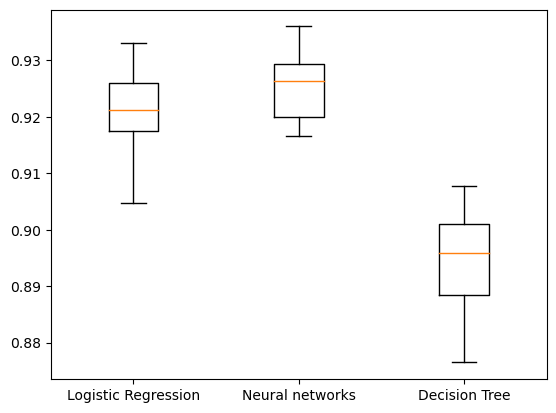

In [151]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

models = {"Logistic Regression": LogisticRegression(), "Neural networks": MLPClassifier(hidden_layer_sizes=(100,), )
,
          "Decision Tree": DecisionTreeClassifier()}


classifiers = [('Logistic Regression', logreg), ('K Nearest Neighbours', knn), ('Classification Tree', clf)]


results = []
profit = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    
    
    cv_results_N = cross_val_score(model, X_train, y_train, cv=kf)
    
    
    results.append(cv_results_N)

plt.boxplot(results, labels=models.keys())
plt.show()



# Profit_top_k(df_results, k = 20, var = 'average cost min')

In [152]:
y_pred = clf.predict(X_val)
y_pred_proba = clf.predict_proba(X_val)
y_pred_proba = [sublist[1] for sublist in y_pred_proba]



from sklearn.metrics import make_scorer

def Profit_top_k_1(estimator, X_val, y_val):
    k = 20
    var = 'average cost min'
    
    estimator.fit(X_val, y_val)
    
    y_pred = estimator.predict(X_val)
    
    y_pred_proba = estimator.predict_proba(X_val)
    y_pred_proba = [sublist[1] for sublist in y_pred_proba]

    averagecostmin = X_val['average cost min']
    
    df_results = pd.DataFrame()
    df_results['y_pred'] = y_pred
    df_results['y_true'] = y_val
    df_results['predict_proba'] = y_pred_proba
    df_results['average cost min'] = list(averagecostmin)
    
    sorted_df = df_results.sort_values(by= "predict_proba", ascending = False)
    sum = 0
    for i in range(0, k):
        if df_results['y_true'][i] == df_results['y_pred'][i]:
            sum += df_results[var][i]
            
            
    return sum

from sklearn.metrics import make_scorer


profit_top_k_scorer = make_scorer(Profit_top_k_1, greater_is_better=True)

# Wrap the custom metric function using make_scorer
profit_top_k_scorer
def Profit_top_k(df_results, k = 20, var = 'average cost min'):
    sorted_df = df_results.sort_values(by= "predict_proba", ascending = False)
    sum = 0
    for i in range(0, k):
        if df_results['y_true'][i] == df_results['y_pred'][i]:
            sum += df_results[var][i]
    return sum

Profit_top_k(df_results)

KeyError: 'predict_proba'

In [ ]:
cv_results_N = cross_val_score(knn, X_val, y_val,cv=2, scoring=profit_top_k_scorer)
cv_results_N

In [ ]:
Profit_top_k_1(knn, X_val, y_val)

In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring=Profit_top_k_1)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean score
print("Mean profit score:", np.mean(cv_scores))

In [ ]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

models = {"Logistic Regression": logreg, "Neural networks": knn
,
          "Decision Tree": clf}


classifiers = [('Logistic Regression', logreg), ('K Nearest Neighbours', knn), ('Classification Tree', clf)]


results = []
profit = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    
    
    cv_results_N = cross_val_score(model, X_val, y_val,cv=kf, scoring=profit_top_k_scorer)
    
    
    results.append(cv_results_N)

plt.boxplot(results, labels=models.keys())
plt.show()


In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Neural Networks": MLPClassifier(hidden_layer_sizes=(100,)),
    "Decision Tree": DecisionTreeClassifier()
}

# Define classifiers for plotting
classifiers = list(models.keys())

results = []
profits = []

# Iterate over models
for model_name, model in models.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    
    # Perform cross-validation
    cv_results = cross_val_score(model, X_val, y_val, cv=kf, scoring=profit_top_k_scorer)

    #cv_results = cross_val_score(model, X_val, y_val, cv=kf, scoring=profit_top_k_scorer)
    results.append(cv_results)
    
    # Store profit scores for each fold
    profits.append(cv_results)
    
    # Display average profit score for the model
    print(f"Average profit score for {model_name}: {np.mean(cv_results)}")

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot(profits, labels=classifiers)
plt.title('Profit Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Profit Score')
plt.show()

## Ensemble Learning

In [ ]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

classifiers = [('Logistic Regression', logreg), ('K Nearest Neighbours', knn), ('Classification Tree', clf)]

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_val)

# Calculate accuracy score
accuracy = accuracy_score(y_val, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

In [88]:
accuracy_scorer = make_scorer(Profit_top_k, greater_is_better=True)


accuracy = accuracy_scorer(y_val, y_pred)  # Assuming 'average cost min' is the relevant variable
print('Accuracy Score:', accuracy)

TypeError: __call__() missing 1 required positional argument: 'y_true'

In [89]:
def Profit_top_k(df_results, k = 20, var = 'average cost min'):
    sorted_df = df_results.sort_values(by= "predict_proba", ascending = False)
    sum = 0
    for i in range(0, k):
        if df_results['y_true'][i] == df_results['y_pred'][i]:
            sum += df_results[var][i]
    return sum

In [90]:
from sklearn.datasets import make_classification

# Define your custom scoring function
def Profit_top_k(df_results, k=20, var='average cost min'):
    sorted_df = df_results.sort_values(by="predict_proba", ascending=False)
    total_profit = 0
    for i in range(k):
        if sorted_df['y_true'].iloc[i] == sorted_df['y_pred'].iloc[i]:
            total_profit += sorted_df[var].iloc[i]
    return total_profit

# Wrap your custom scoring function using make_scorer
profit_scorer = make_scorer(Profit_top_k, greater_is_better=True)

# Example usage with cross-validation
X, y = make_classification(n_samples=100, n_features=20, random_state=42)
model = LogisticRegression()
# Assume df_results is available
# cross_val_score doesn't directly support passing additional arguments to the scoring function,
# so you need to use a wrapper function if you want to pass extra parameters.
# Here, I'm using a lambda function to pass df_results to the scorer.
cv_scores = cross_val_score(vc, X_train, y_train, cv=5, scoring=lambda estimator, X_train, y_train: profit_scorer(estimator, X_train, y_train, df_results= ))
print("Cross-validation scores:", cv_scores)
print("Mean CV Profit:", cv_scores.mean())

SyntaxError: invalid syntax (2680690369.py, line 22)

# Evaluating classification models

In [91]:
# To ignore all warnings
warnings.filterwarnings("ignore")


df_res = {"Logistic Regression": log_reg(), "Neural networks": neural_network()
,
          "Decision Tree": Decision_Tree()}

models = {"Logistic Regression": LogisticRegression(), "Neural networks": MLPClassifier(hidden_layer_sizes=(100,), )
,
          "Decision Tree": DecisionTreeClassifier()}
results = []
profit = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    
    cv_results = Profit_top_k(model, k = 20, var = 'average cost min')
    
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()



# Profit_top_k(df_results, k = 20, var = 'average cost min')

NameError: name 'warnings' is not defined

## Regularized regression

In [92]:
X


,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,...,112.386773,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,...,221.546571,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,...,128.811484,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,...,111.419646,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,...,112.760606,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,K394220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,F,16.0,15/09/97,37.433333,2.0,CAT 200,ASAD90,151.0,1169.400001,201.0,...,279.346320,OK,0.130433,0.615895,0.346500,0.037605,0.127974,F,F,K192650
5040,F,29.0,28/09/96,49.166667,1.0,CAT 100,CAS30,135.0,405.600000,124.0,...,170.946142,OK,0.189112,0.555769,0.412716,0.031515,0.238615,F,F,K295600
5041,M,23.0,08/06/99,16.400000,0.0,CAT 200,BS110,566.0,2382.000000,4.0,...,345.520741,OK,0.112657,0.810121,0.162330,0.027548,0.043094,F,F,K366420
5042,M,46.0,01/03/98,31.866667,2.0,Play 100,S50,72.0,112.200000,31.0,...,83.744194,OK,0.205957,0.323250,0.664650,0.012100,0.171451,F,F,K219850


ValueError: shape mismatch: objects cannot be broadcast to a single shape

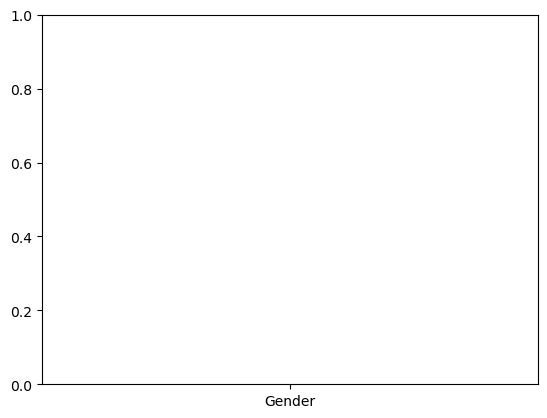

In [93]:
from sklearn.linear_model import Lasso
X_train_df = pd.DataFrame(X_train)
lasso = Lasso(alpha=0.1)
names =  X.drop("id", axis=1).columns
lasso_coef = lasso.fit(X_train, y_train).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()


## model 5: Gradient boosting [score: 2.292013; secondary score: 0.813553]

In [94]:
#install necessary functions
#!pip install xgboost

import xgboost as xgb
from xgboost import XGBClassifier

In [95]:
# Extract text features
cats1 = X_train.select_dtypes(exclude=np.number).columns.tolist()
cats2 = X_val.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats1:
   X_train[col] = X_train[col].astype('category')
for col in cats2:
   X_val[col] = X_val[col].astype('category')

In [96]:
#print the dtypes attribute
X.dtypes

Gender                     object
Age                       float64
Connect_Date               object
L_O_S                     float64
Dropped_Calls             float64
tariff                     object
Handset                    object
Peak_calls_Sum            float64
Peak_mins_Sum             float64
OffPeak_calls_Sum         float64
OffPeak_mins_Sum          float64
Weekend_calls_Sum         float64
Weekend_mins_Sum          float64
International_mins_Sum    float64
Nat_call_cost_Sum         float64
AvePeak                   float64
AveOffPeak                float64
AveWeekend                float64
National_calls            float64
National mins             float64
AveNational               float64
All_calls_mins            float64
Dropped_calls_ratio       float64
Usage_Band                 object
Mins_charge               float64
call_cost_per_min         float64
actual call cost          float64
Total_call_cost           float64
Total_Cost                float64
Tariff_OK     

In [97]:
# Create regression matrices
dtrain_clf_gb = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_clf_gb = xgb.DMatrix(encoded_test, enable_categorical=True)

In [98]:
#training
#define hyperparameters

params = {"objective": "binary:logistic", "tree_method": "hist"}

xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [99]:
model = xgb_classifier.get_booster()

In [100]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)

NameError: name 'dtest_reg' is not defined

In [101]:
#to make it a CSV
df_results = pd.DataFrame()
df_results["ID"] = idtest
df_results["PRED"] = preds
df_results.to_csv("Model_Results_5.csv", index = False)

NameError: name 'preds' is not defined

### model 6: Gradient descent [score: 1.580501; secondary score: 0.410734]

In [102]:
theta = np.random.randn(X_train.shape[1])

In [103]:
def sigmoid(z):
 return 1 / (1 + np.exp(-z))

In [104]:
#define the loss function
def loss(theta, X, y):
 h = sigmoid(X.dot(theta)) 
 return -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

In [105]:
def gradient_descent(theta, X, y, alpha, num_iterations): 
    for i in range(num_iterations):
        h = sigmoid(X.dot(theta)) 
        gradient = X.T.dot(y - h) 
        theta -= alpha * gradient 
    return theta

In [106]:
def predict(theta, X): 
    h = sigmoid(X.dot(theta)) 
    y_pred = np.where(h >= 0.5, 1, 0) 
    return y_pred

preds = predict(theta, encoded_test)

In [107]:
#to make it a CSV
df_results = pd.DataFrame()
df_results["ID"] = idtest
df_results["PRED"] = preds
df_results.to_csv("Model_Results_6.csv", index = False)

## model 7: Bagging [score: 2.190216; secondary score: 0.7896]

In [108]:
#import necessary functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [109]:
#leanring
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [110]:
#make prediction on the testing data

from sklearn.metrics import classification_report
preds = pipeline.predict(encoded_test)

In [111]:
#to make it a CSV
df_results = pd.DataFrame()
df_results["ID"] = idtest
df_results["PRED"] = preds
df_results.to_csv("Model_Results_7.csv", index = False)

## model 8: k-NN [score: 3.891976; secondary score: 0.78756]

In [112]:
#import necessary functions
from sklearn.neighbors import KNeighborsClassifier

In [113]:
#define accuracy
neighbors = np.arange(1,9)
train_accuracy =np.zeros(len(neighbors))
val_accuracy = np.zeros(len(neighbors))

In [114]:
#establish the model
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    val_accuracy[i] = knn.score(X_val, y_val)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

NameError: name 'test_accuracy' is not defined

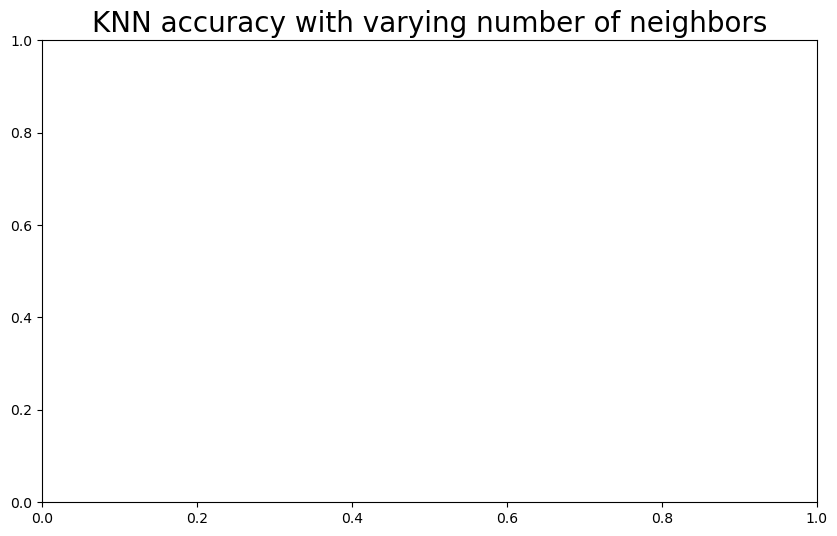

In [115]:
#plotting to see the results
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
#when n=5 tesing accurancy is higher
knn = KNeighborsClassifier(n_neighbors=5)

#Fit the model
knn.fit(X_train, y_train)

#Compute accuracy on the training set
train_accuracy[i] = knn.score(X_train, y_train)

#Compute accuracy on the test set
val_accuracy[i] = knn.score(X_val, y_val)

In [ ]:
val_accuracy

In [ ]:
model = knn.fit(X_train, y_train)

preds = model.predict(encoded_test)

In [ ]:
#to make it a CSV
df_results = pd.DataFrame()
df_results["ID"] = idtest
df_results["PRED"] = preds
df_results.to_csv("Model_Results_8.csv", index = False)

In [ ]:
#More to explore
#PCA
#Oversampling, undersampling

# Work in progress 👇👇👇

# # Working to make the profit metric work in crossvalidation

In [117]:
from sklearn.metrics import make_scorer
### The challenge is to include the profit_top_K metrics in the crossvalidation. 
#For now I keep on getting Nan values but works when used sepratly 



def Profit_top_k_1(estimator, X_train, y_train):
    k = 20
    var = 'average cost min'
    
    estimator.fit(X_train, y_train)
    
    y_pred = estimator.predict(X_train)
    
    y_pred_proba = estimator.predict_proba(X_train)
    y_pred_proba = [sublist[1] for sublist in y_pred_proba]

    averagecostmin = X_val['average cost min']
    
    df_results = pd.DataFrame()
    df_results['y_pred'] = y_pred
    df_results['y_true'] = y_train
    df_results['predict_proba'] = y_pred_proba
    df_results['average cost min'] = list(averagecostmin)
    
    sorted_df = df_results.sort_values(by= "predict_proba", ascending = False)
    sum = 0
    for i in range(0, k):
        if df_results['y_true'][i] == df_results['y_pred'][i]:
            sum += df_results[var][i]
            
            
    return sum

from sklearn.metrics import make_scorer


profit_top_k_scorer = make_scorer(Profit_top_k_1, greater_is_better=True) ##With make scrorer it didn't work

cv_results_N = cross_val_score(knn, X_val, y_val,cv=2, scoring=profit_top_k_scorer)
cv_results_N

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.9/site-packages/skl

array([nan, nan])

In [187]:
def Profit_top_k_1(estimator, X_train, y_train):
    k = 20
    var = 'average cost min'
    
    estimator.fit(X_train, y_train)
    
    y_pred = estimator.predict(X_train)
    
    y_pred_proba = estimator.predict_proba(X_train)
    y_pred_proba = [sublist[1] for sublist in y_pred_proba]

    averagecostmin = X_train['average cost min']
    
    df_results = pd.DataFrame()
    df_results['y_pred'] = y_pred
    df_results['y_true'] = y_train
    df_results['predict_proba'] = y_pred_proba
    df_results['average cost min'] = list(averagecostmin)
    
    sorted_df = df_results.sort_values(by= "predict_proba", ascending = False)
    #print (sorted_df)
    #print (sorted_df['average cost min'].iloc[0])
    sum = 0
    for i in range(0, k):
        if sorted_df['y_true'][i] == sorted_df['y_pred'][i]:
            
            sum += sorted_df['average cost min'].iloc[i]
            #print (sum)
            
    return sum

def dummy_scorer(estimator, X, y):   # Just to try the scroring 
    
    return 1

cv_results_N = cross_val_score(knn, X_train, y_train, cv=4, scoring=Profit_top_k_1)
cv_results_N_2 = cross_val_score(logreg, X_train, y_train, cv=2, scoring=Profit_top_k_1)

cv_results_N


array([2.09899539, 0.        , 0.        , 0.        ])

In [188]:
Profit_top_k_1(logreg, X_train, y_train)

2.8471670515663705

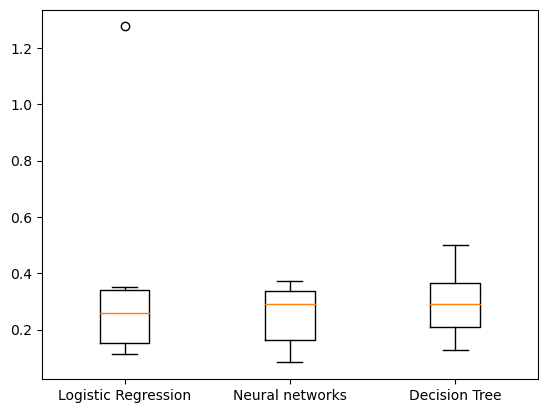

In [189]:
models = {"Logistic Regression": logreg, "Neural networks": MLPClassifier(hidden_layer_sizes=(100,), )
,
          "Decision Tree": DecisionTreeClassifier()}


classifiers = [('Logistic Regression', logreg), ('K Nearest Neighbours', knn), ('Classification Tree', clf)]


results = []
profit = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    
    
    cv_results_N = cross_val_score(model, X_train, y_train, cv=kf, scoring=Profit_top_k_1)
    
    
    results.append(cv_results_N)

plt.boxplot(results, labels=models.keys())
plt.show()